# Python notebook accompanying the data release of the search products of GWTC-2.1

The search candidate products associated with [GWTC-2.1](https://dcc.ligo.org/LIGO-P2100063/public) are available as **search_data_GWTC2p1.tar.xml.gz** through [Zenodo](https://www.doi.org/10.5281/zenodo.5117762). This notebook serves as an example on how to read the different files contained in there. 

## Description of files
The tar file contains a directory called search_data_products. This directory contains a sub directory for each of the searches that were used to detect candidates in GWTC-2.1: **gstlal_all_sky**, **mbta_all_sky**, **pycbc_all_sky**, and **pycbc_highmass**. These refer to the GSTLAL, MBTA, PYCBC, and PYCBC-BBH searches respectively in the paper.

Each search directory contains trigger files corresponding to candidates that pass the false alarm rate (FAR) threshold of 2/day considered by GWTC-2.1, and a directory, **pastro**, containing the pastro json files, and a directory called **skymaps**, containing the skymap fits files.

There are a total of 1391 files contained in the different search directories. These correspond to the 1201 events in GWTC-2.1, where we have counted files from different searches that are within a second of each other as one event.

All files follow the [T050017](https://dcc.ligo.org/T050017) naming convention. 

For example, trigger files might be called: 

* `gstlal_all_sky/H1L1V1-GSTLAL_AllSky-1241208674-1.xml`
* `mbta_all_sky/H1L1-MBTA_AllSky-1244490664-1.xml.gz`
* `pycbc_highmass/H1L1-PYCBC_HighMass-1246338787-1.xml`
* `pycbc_all_sky/H1L1-PYCBC_AllSky-1250171712-1.xml`

The T050017 convention requires that the first string in the description is the source of the data, i.e. one or more interferometers from which a trigger was found for this event. Note that this is not necessarily the same as the set of interferometers which were in observing mode at the time of the event. The second string is the upper case pipeline and chosen search tag with the correct case (these separated by underscore). The third string is the gps time of the event. 

For each trigger, there is a corresponding pastro file and a skymap file. The pastro files for the example triggers mentioned above can be found in:

* `gstlal_all_sky/pastro/H1L1V1-GSTLAL_AllSky-1241208674-1.json`
* `mbta_all_sky/pastro/H1L1-MBTA_AllSky-1244490664-1.json`
* `pycbc_highmass/pastro/H1L1-PYCBC_HighMass-1246338787-1.json`
* `pycbc_all_sky/pastro/H1L1-PYCBC_AllSky-1250171712-1.json`

The skymap files for the example triggers can be found in:

* `gstlal_all_sky/skymaps/H1L1V1-GSTLAL_AllSky-1241208674-1.fits`
* `mbta_all_sky/skymaps/H1L1-MBTA_AllSky-1244490664-1.fits`
* `pycbc_highmass/skymaps/H1L1-PYCBC_HighMass-1246338787-1.fits`
* `pycbc_all_sky/skymaps/H1L1-PYCBC_AllSky-1250171712-1.fits`

## Reading a trigger file
The trigger files use a custom scheme of XML in which to store tabular data, called LIGO_LW. The python library - [python-ligo-lw](https://git.ligo.org/kipp.cannon/python-ligo-lw) allows users to read and write all of the different types of tabular data produced by gravitational-wave searches.

Here, we show how to read the files using [gwpy](https://gwpy.github.io/docs/stable/table/io.html), which extends the Astropy Table object functionality with the LIGO_LW format. The files can also be read directly using the [python-ligo-lw](https://git.ligo.org/kipp.cannon/python-ligo-lw) library.


In [1]:
from gwpy.table import Table

In our example, we read the file `gstlal_all_sky/H1L1V1-GSTLAL_AllSky-1241208674-1.xml`. There are multiple tables in the trigger file. The data associated with the trigger parameters is called `sngl_inspiral`.

In [2]:
GSTLAL_AllSky_1241208674_SNGL=Table.read(
    "gstlal_all_sky/H1L1V1-GSTLAL_AllSky-1241208674-1.xml", 
    tablename="sngl_inspiral")

Accessing available datafields with `colnames`:

In [3]:
GSTLAL_AllSky_1241208674_SNGL.colnames

['Gamma0',
 'Gamma1',
 'Gamma2',
 'Gamma3',
 'Gamma4',
 'Gamma5',
 'Gamma6',
 'Gamma7',
 'Gamma8',
 'Gamma9',
 'alpha',
 'alpha1',
 'alpha2',
 'alpha3',
 'alpha4',
 'alpha5',
 'alpha6',
 'amplitude',
 'bank_chisq',
 'bank_chisq_dof',
 'beta',
 'channel',
 'chi',
 'chisq',
 'chisq_dof',
 'coa_phase',
 'cont_chisq',
 'cont_chisq_dof',
 'eff_distance',
 'end_time',
 'end_time_gmst',
 'end_time_ns',
 'eta',
 'event_duration',
 'event_id',
 'f_final',
 'ifo',
 'impulse_time',
 'impulse_time_ns',
 'kappa',
 'mass1',
 'mass2',
 'mchirp',
 'mtotal',
 'process_id',
 'psi0',
 'psi3',
 'rsqveto_duration',
 'search',
 'sigmasq',
 'snr',
 'spin1x',
 'spin1y',
 'spin1z',
 'spin2x',
 'spin2y',
 'spin2z',
 'tau0',
 'tau2',
 'tau3',
 'tau4',
 'tau5',
 'template_duration',
 'ttotal']

Suppose you want to know the values of corresponding interferometer, template mass 1, template mass 2, template spin 1, template spin 2, signal-to-noise ratio, chi-squared test, gps end time, gps end time (nano second part), phase of coalescence:

In [4]:
GSTLAL_AllSky_1241208674_SNGL['ifo', 'mass1', 'mass2', 'spin1z', 'spin2z', 'snr', 'chisq', 'end_time', 'end_time_ns', 'coa_phase']

<Table length=3>
ifo    mass1     mass2      spin1z    ...  end_time  end_time_ns coa_phase 
str2  float32   float32    float32    ...   int32       int32     float32  
---- --------- --------- ------------ ... ---------- ----------- ----------
  H1 13.708306 1.6956995 -0.011699861 ... 1241208674   553558036  0.3114331
  L1 13.708306 1.6956995 -0.011699861 ... 1241208674   545532325 -2.8156953
  V1 13.708306 1.6956995 -0.011699861 ... 1241208674   577148438  1.1635327

The significance of a candidate is contained in the table `coinc_inspiral`.

In [5]:
GSTLAL_AllSky_1241208674_COINC = Table.read(
    "gstlal_all_sky/H1L1V1-GSTLAL_AllSky-1241208674-1.xml", 
    tablename="coinc_inspiral")

In [6]:
GSTLAL_AllSky_1241208674_COINC['combined_far', 'snr', 'mchirp']

<Table length=1>
     combined_far            snr              mchirp     
       float64             float64           float64     
--------------------- ----------------- -----------------
4.995971935070114e-06 8.455768902045088 3.821843385696411

These files also contain the PSD around the time of the event from all the operating interferometers.

In [7]:
>>> from gwpy.frequencyseries import FrequencySeries

Here we show how to read the PSD for LIGO Hanford. For LIGO Livingston, the name of the interferometer is "L1", for Virgo it is "V1".

In [8]:
GSTLAL_AllSky_1241208674_H1_PSD = FrequencySeries.read("gstlal_all_sky/H1L1V1-GSTLAL_AllSky-1241208674-1.xml", 
                                                       name="H1")

In [9]:
GSTLAL_AllSky_1241208674_H1_PSD

<FrequencySeries([1.17199434e-48, 1.23198998e-48, 1.40339889e-48,
                  ..., 1.47529747e-56, 1.00641748e-56,
                  5.52134659e-57]
                 unit=Unit("1 / Hz"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.25 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=1241210570.0>,
                 name='H1',
                 channel=None)>

In [10]:
GSTLAL_AllSky_1241208674_H1_PSD.frequencies

<Index [0.00000e+00, 2.50000e-01, 5.00000e-01, ..., 8.19150e+03,
        8.19175e+03, 8.19200e+03] Hz>

## Reading a pastro file
We use the corresponding pastro file for the event we considered in the example above:
`gstlal_all_sky/pastro/H1L1V1-GSTLAL_AllSky-1241208674-1.json`

In [11]:
import json

In [12]:
with open("gstlal_all_sky/pastro/H1L1V1-GSTLAL_AllSky-1241208674-1.json", 'r') as fp:
    pastro_GSTLAL_1241208674 = json.load(fp)

In [13]:
pastro_GSTLAL_1241208674

{'Terrestrial': 0.9794992109650745,
 'BNS': 0.0,
 'NSBH': 5.9342103631785e-05,
 'Astro': 0.02050078903492547,
 'BBH': 0.02044144692821258}

## Skymaps
The sky localizations for GWTC-2.1 were made using BAYESTAR ([git](https://git.ligo.org/lscsoft/ligo.skymap), [docs](https://lscsoft.docs.ligo.org/ligo.skymap/#)). The sky localizations can be plotted directly using the command line  tool `ligo-skymap-plot`.
For our example, we read and plot in python. We use the corresponding skymap for the same event we have considered in our examples: `gstlal_all_sky/skymaps/H1L1V1-GSTLAL_AllSky-1241208674-1.fits`

In [14]:
from ligo.skymap.io import fits
from ligo.skymap import postprocess 
import ligo.skymap.plot

In [15]:
fits_GSTLAL_1241208674 = "gstlal_all_sky/skymaps/H1L1V1-GSTLAL_AllSky-1241208674-1.fits"

In [16]:
contour_levels = [50,90]
skymap, metadata = fits.read_sky_map(fits_GSTLAL_1241208674, nest=None)
cls = 100 * postprocess.find_greedy_credible_levels(skymap)

In [17]:
skymap

array([9.38635656e-10, 9.38635656e-10, 9.38635656e-10, ...,
       1.20429111e-08, 1.20429111e-08, 1.20429111e-08])

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

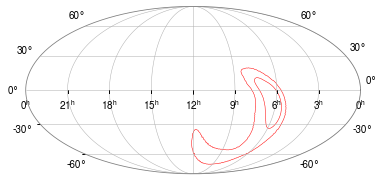

In [19]:
ax = plt.axes(projection=('astro hours mollweide'))
cs = ax.contour_hpx(
            (cls, 'ICRS'), nested=metadata['nest'],
            colors='red', linewidths=0.5, levels=contour_levels)